In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [42]:
df = pd.read_csv("data/knn/data-knn-2024-04-07.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94208 entries, 0 to 94207
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94208 non-null  float64
 1   id_mls                    94208 non-null  object 
 2   bathrooms_total           94208 non-null  float64
 3   bedrooms_extra            94208 non-null  float64
 4   bedrooms                  94208 non-null  float64
 5   stories_total             94208 non-null  float64
 6   size_interior             94208 non-null  float64
 7   building_type             94208 non-null  object 
 8   agency_name               94208 non-null  object 
 9   agency_type               94208 non-null  object 
 10  property_type             94208 non-null  object 
 11  lng                       94208 non-null  float64
 12  lat                       94208 non-null  float64
 13  ownership_type            94208 non-null  object 
 14  owners

In [44]:
df["province"].value_counts()

province
Ontario                    39921
British Columbia           21414
Alberta                    13016
Quebec                      9053
Saskatchewan                4009
Manitoba                    2801
Nova Scotia                 1807
New Brunswick               1299
Prince Edward Island         370
Newfoundland & Labrador      364
Yukon                         99
Northwest Territories         55
Name: count, dtype: int64

In [45]:
df["province"].value_counts()

province
Ontario                    39921
British Columbia           21414
Alberta                    13016
Quebec                      9053
Saskatchewan                4009
Manitoba                    2801
Nova Scotia                 1807
New Brunswick               1299
Prince Edward Island         370
Newfoundland & Labrador      364
Yukon                         99
Northwest Territories         55
Name: count, dtype: int64

In [46]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [47]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       39921.0
mean       947110.0
std        595586.0
min        159900.0
25%        599900.0
50%        799900.0
75%       1099900.0
max      13779000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

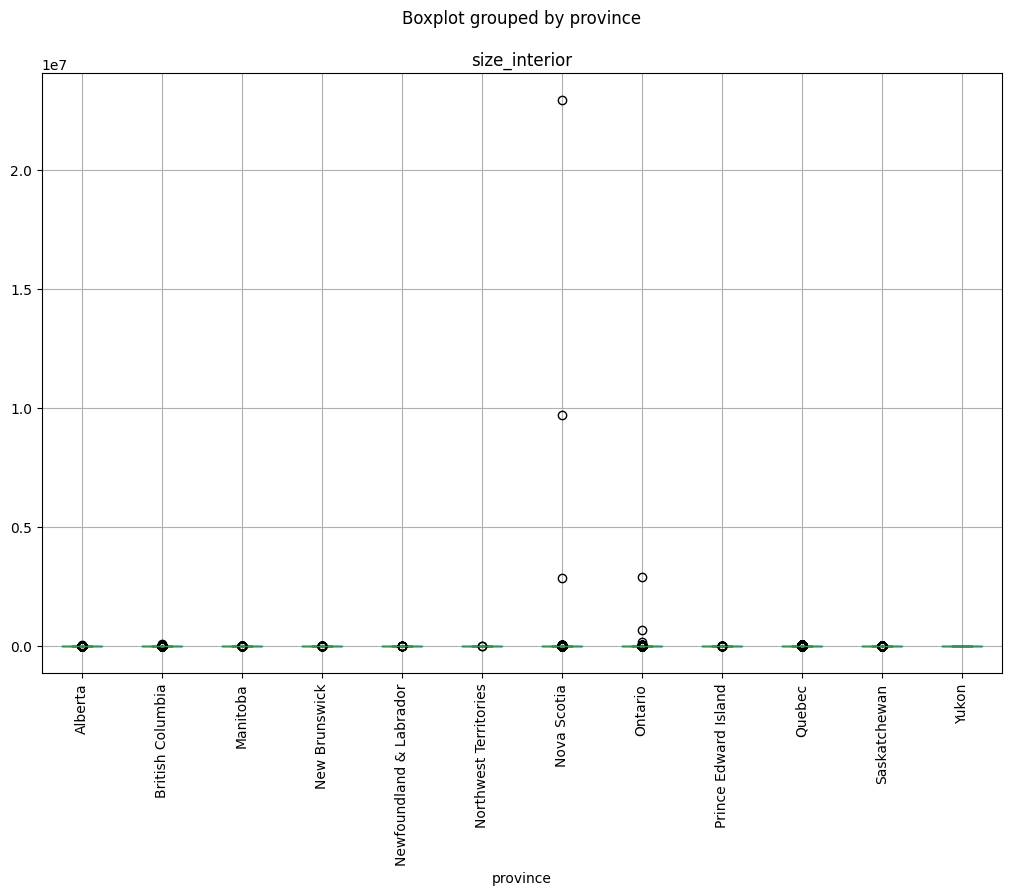

In [48]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [49]:
q0 = 0
# q1 = df["size_interior"].quantile(0.1)
q25 = df["size_interior"].quantile(0.25)
q75 = df["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

In [50]:
abs(q25-q0)*0.33

346.683975

<Axes: title={'center': 'size_interior'}, xlabel='province'>

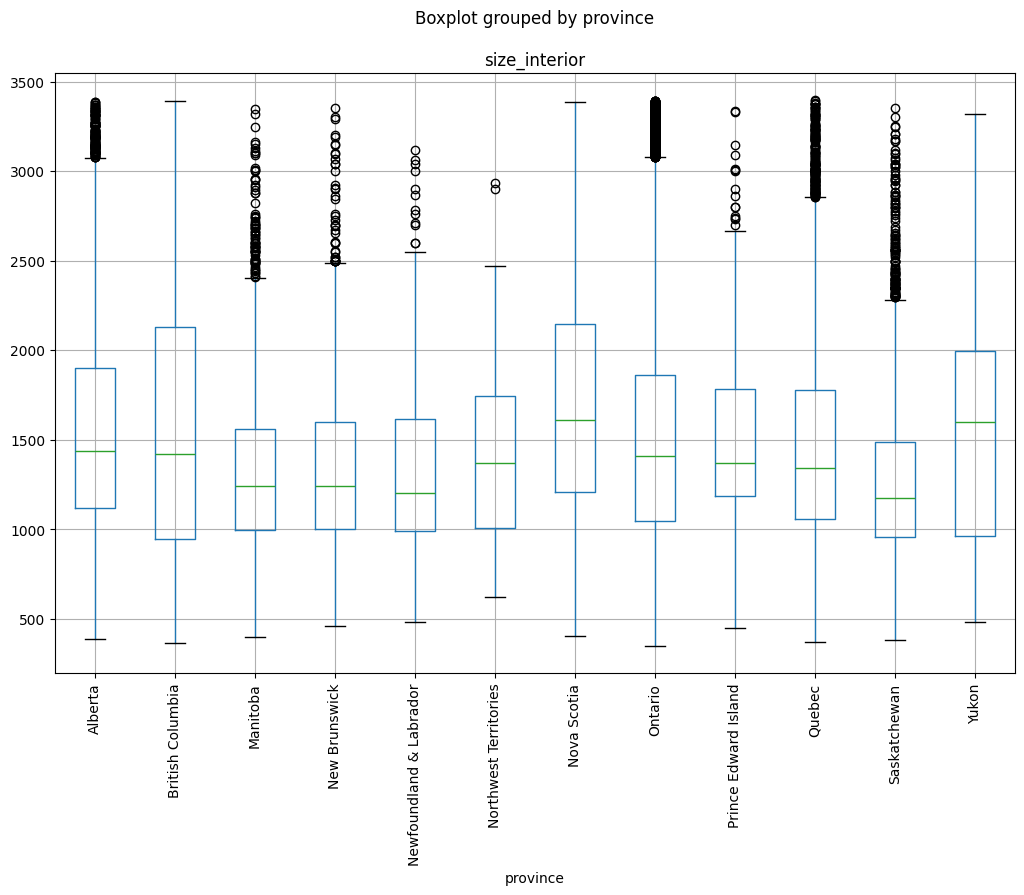

In [51]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

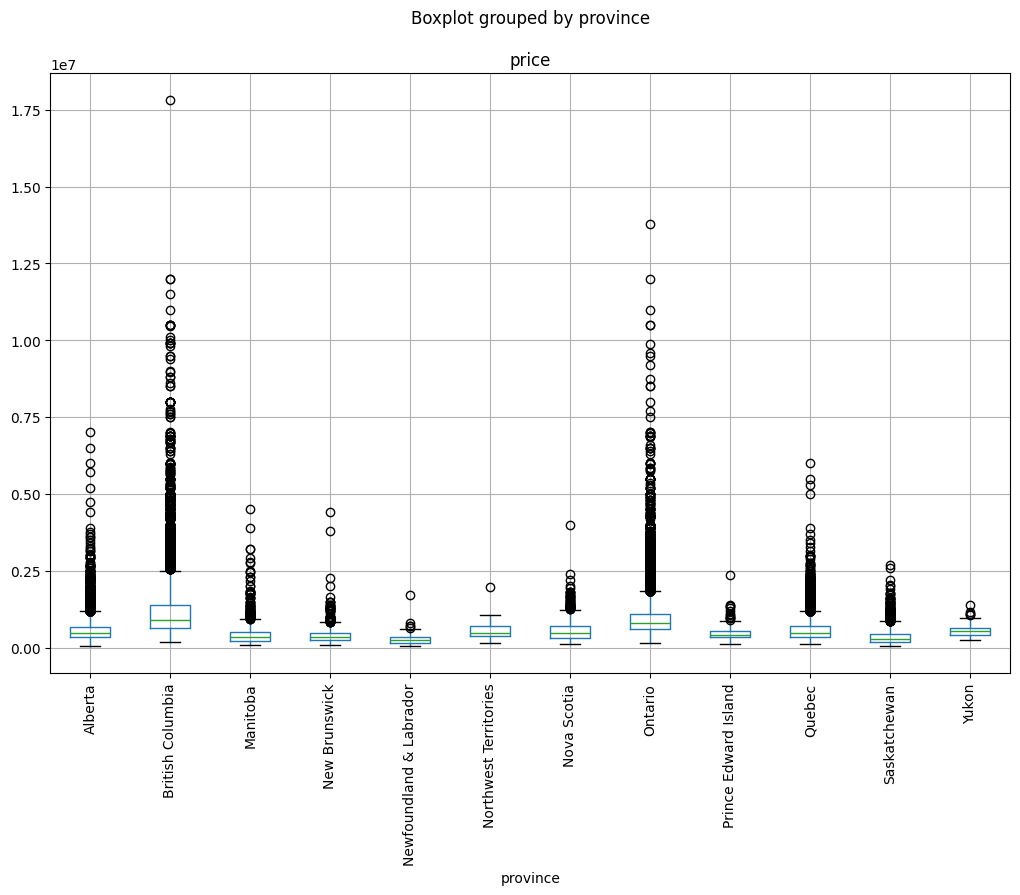

In [52]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [53]:
df["province"].value_counts()

province
Ontario                    39035
British Columbia           19657
Alberta                    12835
Quebec                      7679
Saskatchewan                4009
Manitoba                    2795
Nova Scotia                 1573
New Brunswick               1289
Newfoundland & Labrador      363
Prince Edward Island         337
Yukon                         99
Northwest Territories         55
Name: count, dtype: int64

In [54]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       39035.0
mean       928619.0
std        549123.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      13779000.0
Name: price, dtype: float64

In [55]:
from sklearn.neighbors import LocalOutlierFactor

In [56]:
lof = LocalOutlierFactor(n_neighbors=30)
lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])

df = df[lof_labels==1]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85325 entries, 0 to 94207
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85325 non-null  float64
 1   id_mls                    85325 non-null  object 
 2   bathrooms_total           85325 non-null  float64
 3   bedrooms_extra            85325 non-null  float64
 4   bedrooms                  85325 non-null  float64
 5   stories_total             85325 non-null  float64
 6   size_interior             85325 non-null  float64
 7   building_type             85325 non-null  object 
 8   agency_name               85325 non-null  object 
 9   agency_type               85325 non-null  object 
 10  property_type             85325 non-null  object 
 11  lng                       85325 non-null  float64
 12  lat                       85325 non-null  float64
 13  ownership_type            85325 non-null  object 
 14  ownership_t

In [58]:
df["province"].value_counts()

province
Ontario                    37549
British Columbia           18632
Alberta                    12056
Quebec                      7195
Saskatchewan                3771
Manitoba                    2640
Nova Scotia                 1470
New Brunswick               1223
Prince Edward Island         322
Newfoundland & Labrador      318
Yukon                         96
Northwest Territories         53
Name: count, dtype: int64

In [59]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       37549.0
mean       925144.0
std        535215.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      10995000.0
Name: price, dtype: float64

In [60]:
df.to_csv("data/lof/data-lof-2024-04-07.csv", index=False)